In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from numpy import absolute,mean,std
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, StratifiedKFold,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn import tree
from sklearn import metrics
import math as m
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')
sns.set_palette('husl',8)

In [3]:
import pandas as pd
life_df = pd.read_csv("lifeexpectancy.csv")
life_df

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


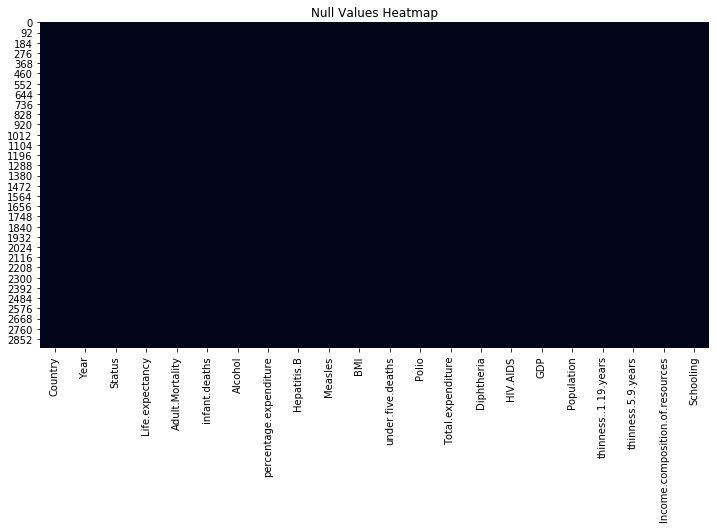

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(life_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [5]:
print((f'Number of columns: {len(life_df.columns)}'))
life_df.columns

Number of columns: 22


Index(['Country', 'Year', 'Status', 'Life.expectancy', 'Adult.Mortality',
       'infant.deaths', 'Alcohol', 'percentage.expenditure', 'Hepatitis.B',
       'Measles', 'BMI', 'under.five.deaths', 'Polio', 'Total.expenditure',
       'Diphtheria', 'HIV.AIDS', 'GDP', 'Population', 'thinness..1.19.years',
       'thinness.5.9.years', 'Income.composition.of.resources', 'Schooling'],
      dtype='object')

# Correlation Analysis

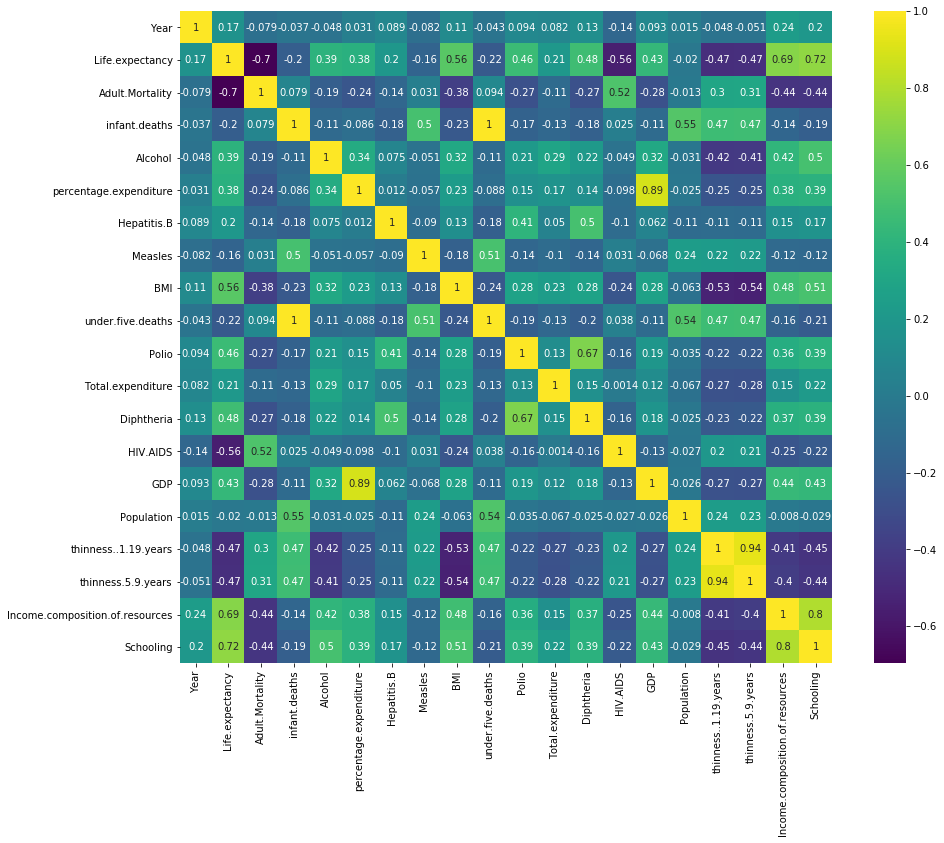

In [6]:
# correlation heat map
corr = life_df[['Country', 'Year', 'Status', 'Life.expectancy', 'Adult.Mortality',
       'infant.deaths', 'Alcohol', 'percentage.expenditure', 'Hepatitis.B',
       'Measles', 'BMI', 'under.five.deaths', 'Polio', 'Total.expenditure',
       'Diphtheria', 'HIV.AIDS', 'GDP', 'Population', 'thinness..1.19.years',
       'thinness.5.9.years', 'Income.composition.of.resources', 'Schooling']].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, square=True, annot=True, cmap='viridis');

# Principal Component Analysis

In [7]:
PCA_df = life_df[['Life.expectancy','Adult.Mortality', 'Schooling',
                  'BMI', 'Polio','Income.composition.of.resources','Diphtheria']]

stndzd_PCA_df = StandardScaler().fit_transform(PCA_df)

sklearn_PCA = PCA(n_components=4)

PCs = sklearn_PCA.fit_transform(stndzd_PCA_df)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA: \n',
    #sklearn_PCA.components_,
    sklearn_PCA.explained_variance_ratio_,
    '\n Eigenvalues of each component: \n',
    sklearn_PCA.explained_variance_
    
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA: 
 [0.55657969 0.15773336 0.09871953 0.08467084] 
 Eigenvalues of each component: 
 [3.89738439 1.10450943 0.69127197 0.59289767]


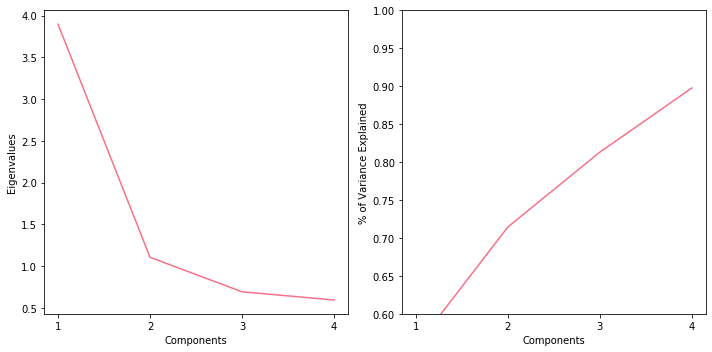

In [8]:
# Let's visualize the above values
fig, ax = plt.subplots(figsize=(10,5))

ax1 = plt.subplot(121)
plt.plot(sklearn_PCA.explained_variance_)
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels([1,2,3,4])
ax1.set_xlabel('Components')
ax1.set_ylabel('Eigenvalues')


ax2 = fig.add_subplot(122)
plt.plot(np.cumsum(sklearn_PCA.explained_variance_ratio_))
ax2.set_ylabel('% of Variance Explained')
ax2.set_xlabel('Components')
ax2.set_xticks([0,1,2,3])
ax2.set_xticklabels([1,2,3,4])
ax2.set_ylim(.6,1);

plt.tight_layout()

In [9]:
data=pd.read_csv('lifeexpectancy.csv')
df=data.drop(['Country','Year','Status'], axis=1)
df

,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
X_RF=df.drop(['Life.expectancy','under.five.deaths','infant.deaths','thinness..1.19.years','thinness.5.9.years','percentage.expenditure','GDP'],axis=1)
Y_RF=df['Life.expectancy']
scaler = preprocessing.RobustScaler()
np_scaled_RF = scaler.fit_transform(X_RF)
data_norm_RF = pd.DataFrame(np_scaled_RF, columns=X_RF.columns)

In [11]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(data_norm_RF, Y_RF, test_size=0.3, random_state=69)

In [12]:
rf_reg = RandomForestRegressor(random_state=69)
rf_regf = rf_reg.fit(X_train_RF,y_train_RF)

In [13]:
y_pred_RF = rf_regf.predict(X_test_RF)
mse1=mean_squared_error(y_test_RF, y_pred_RF)
mse1

3.980998212929113

In [14]:
# Parameter Tuning for rf

In [15]:
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
param_grid = { 
        "max_depth"         : max_depth,
        "n_estimators"      : [10,20,30],
        "max_features"      : ['auto', 'sqrt','log2'],
        "min_samples_split" : [2, 5, 10, 15],
        "min_samples_leaf"  : [1, 2, 5, 10],
        "bootstrap": [True, False]
        }

grid = GridSearchCV(rf_reg, param_grid, n_jobs=-1, cv=5)
grid.fit(X_train_RF,y_train_RF)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=69,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [16]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [38]:
grid.best_score_

0.955039526970831

In [17]:
rf_reg_best = RandomForestRegressor(criterion = 'mse', max_features = 'sqrt' , max_depth= 30,
                                    min_samples_leaf = 1, bootstrap=False, min_samples_split=2,n_estimators=30)
rf_regf_best = rf_reg_best.fit(X_train_RF,y_train_RF)

In [18]:
y_pred_RF_best = rf_regf_best.predict(X_test_RF)
mse=mean_squared_error(y_test_RF, y_pred_RF_best)

In [19]:
mse

4.071936841647073

In [20]:
r2_score(y_test_RF, y_pred_RF_best)*100

95.19426650156846

In [21]:
feature_imp = pd.DataFrame(rf_regf_best.feature_importances_, index=X_train_RF.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
HIV.AIDS,0.238145
Income.composition.of.resources,0.221030
Adult.Mortality,0.193153
Schooling,0.124696
BMI,0.061621
Diphtheria,0.044551
Polio,0.040789
Alcohol,0.024167
Total.expenditure,0.018289
Measles,0.016365


In [44]:
# Plot of Feature Importance 

In [22]:
rf_reg_best.feature_importances_

array([0.19315318, 0.02416689, 0.0091111 , 0.01636548, 0.06162109,
       0.0407891 , 0.0182886 , 0.0445506 , 0.23814468, 0.00808418,
       0.22102958, 0.12469553])

In [23]:
X_RF.columns

Index(['Adult.Mortality', 'Alcohol', 'Hepatitis.B', 'Measles', 'BMI', 'Polio',
       'Total.expenditure', 'Diphtheria', 'HIV.AIDS', 'Population',
       'Income.composition.of.resources', 'Schooling'],
      dtype='object')

<BarContainer object of 12 artists>

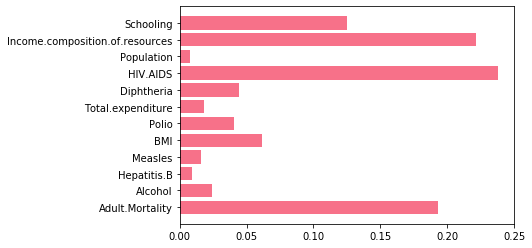

In [24]:
plt.barh(X_RF.columns, rf_reg_best.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

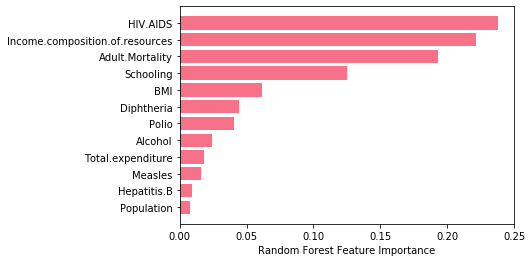

In [25]:
sorted_idx = rf_reg_best.feature_importances_.argsort()
plt.barh(X_RF.columns[sorted_idx], rf_reg_best.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# LASSO REGRESSION

In [26]:
X_L=df.drop(['Life.expectancy','under.five.deaths','infant.deaths','thinness..1.19.years','thinness.5.9.years','percentage.expenditure','GDP'],axis=1)
Y_L=df['Life.expectancy']

In [27]:
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L, Y_L, test_size=0.3, random_state=42)
lr = Lasso(alpha=0.01)
lr.fit(X_train_L, y_train_L)
y_pred_L = lr.predict(X_test_L)

In [28]:
mse=mean_squared_error(y_test_L, y_pred_L)
mse

18.355063815885128

In [52]:
#Tuning Parameters

In [29]:
alphas = np.array([ 1, 0.02, 0.03, 0.06, 0.024, 0.025, 0.026, 0.03])
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train_L, y_train_L)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.   , 0.02 , 0.03 , 0.06 , 0.024, 0.025, 0.026, 0.03 ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid.best_params_

{'alpha': 0.02}

In [31]:
lr_best = Lasso(alpha=0.02)
lr_best.fit(X_train_L, y_train_L)
y_pred_LRBest = lr_best.predict(X_test_L)

In [32]:
mse=mean_squared_error(y_test_L, y_pred_LRBest)
mse

18.362505487024663

In [33]:
r2_score(y_test_L, y_pred_LRBest)*100

80.35069192003564

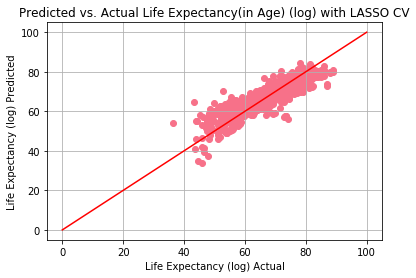

In [34]:
# Plot
plt.scatter(y_test_L, y_pred_LRBest)
plt.plot([0,100],[0,100],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Life Expectancy(in Age) (log) with LASSO CV')
plt.ylabel('Life Expectancy (log) Predicted')
plt.xlabel('Life Expectancy (log) Actual');

# RIDGE REGRESSION

In [35]:
X_R=df.drop(['Life.expectancy','under.five.deaths','infant.deaths','thinness..1.19.years','thinness.5.9.years','percentage.expenditure','GDP'],axis=1)
Y_R=df['Life.expectancy']

In [36]:
X_train_R,X_test_R,y_train_R,y_test_R=train_test_split(X_R,Y_R,test_size=0.3,random_state=69)
lrr = LinearRegression()
rr = Ridge(alpha=1)
rr.fit(X_train_R, y_train_R)
y_pred_R = rr.predict(X_test_R)

In [37]:
mse=mean_squared_error(y_test_R, y_pred_R)
mse

18.64068375359607

In [38]:
r2_score(y_test_R, y_pred_R)*100

78.00011104492236

In [39]:
#Tuning Parameters

In [40]:
alphas = np.array([ 1, 0.02, 0.03, 0.06, 0.05,0.024, 1.0, 100])
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train_R, y_train_R)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.0e+00, 2.0e-02, 3.0e-02, 6.0e-02, 5.0e-02, 2.4e-02, 1.0e+00,
       1.0e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
grid.best_params_

{'alpha': 0.06}

In [42]:
rr_best = Ridge(alpha=0.06)
rr_best.fit(X_train_R, y_train_R)
y_pred_R_best = rr_best.predict(X_test_R)

In [43]:
mse1=mean_squared_error(y_test_R, y_pred_R_best)
mse1

18.632807618039568

In [44]:
r2_score(y_test_R, y_pred_R_best)*100

78.00940652517022

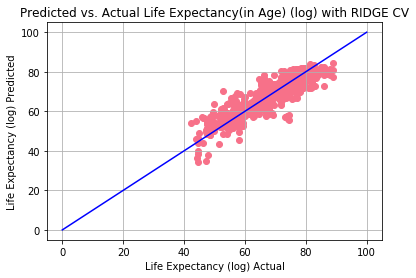

In [45]:
# Plot
plt.scatter(y_test_R, y_pred_R_best)
plt.plot([0,100],[0,100],color='blue')
plt.grid(True)
plt.title('Predicted vs. Actual Life Expectancy(in Age) (log) with RIDGE CV')
plt.ylabel('Life Expectancy (log) Predicted')
plt.xlabel('Life Expectancy (log) Actual');

# Decision Tree Regression

In [49]:
X=df.drop(['Life.expectancy'],axis=1)
Y=df['Life.expectancy']
scaler = preprocessing.RobustScaler()
np_scaled = scaler.fit_transform(X)
data_norm = pd.DataFrame(np_scaled, columns=X.columns)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, Y, test_size=0.2, random_state=62) # Splitting the training & test set

In [51]:
dt_reg = DecisionTreeRegressor(random_state=62)     
dt_regf = dt_reg.fit(X_train,y_train)                      # Fitting the model

In [52]:
y_pred_dt = dt_regf.predict(X_test)                     # Predicting the test life expectency

In [74]:
## Hyper Parameter Tuning

In [53]:
param_grid = {
        "min_samples_split": [5,10, 20, 40],
        "max_depth"      : range(2,20),
        "max_leaf_nodes": range(10,200,10)
        }

grid = GridSearchCV(dt_reg, param_grid, n_jobs=-1, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=62, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 20),
                         'max_leaf_nodes': range(10, 200, 10),
                         'min_samples_split': [5, 10, 20, 40]},
             pre_dispatch

In [54]:
grid.best_params_              # Generating the best paramaters

{'max_depth': 10, 'max_leaf_nodes': 130, 'min_samples_split': 10}

In [55]:
grid.best_score_

0.9222601049421986

In [56]:
### Decision Tree regression with best parameter values

In [57]:
dt_reg_best = DecisionTreeRegressor(criterion = 'mse', max_depth = 10, max_leaf_nodes = 130,min_samples_split = 10 )
dt_regf_best = dt_reg_best.fit(X_train,y_train)

In [58]:
y_pred_dt_best = dt_regf_best.predict(X_test)
mse=mean_squared_error(y_test, y_pred_dt_best)             # Calculating MSE 

In [59]:
mse

6.535479415472587

In [60]:
r2_score(y_test, y_pred_dt)*100

92.43291385472286

In [61]:
r2_score(y_test, y_pred_dt_best)*100

92.46793654027331

In [62]:
feature_imp = pd.DataFrame(dt_regf_best.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
HIV.AIDS,0.611958
Adult.Mortality,0.196437
Income.composition.of.resources,0.098624
Schooling,0.040680
BMI,0.012010
under.five.deaths,0.009478
Alcohol,0.007838
thinness.5.9.years,0.005348
Total.expenditure,0.003280
percentage.expenditure,0.002441


In [85]:
# Generating the decision tree with max depth of 3

In [65]:
dt = DecisionTreeRegressor(max_depth=3)

In [66]:
dt.fit(X_train,y_train)   

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [67]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_11 <= 0.79
|   |--- feature_0 <= 0.11
|   |   |--- feature_16 <= 0.58
|   |   |   |--- value: [73.95]
|   |   |--- feature_16 >  0.58
|   |   |   |--- value: [80.63]
|   |--- feature_0 >  0.11
|   |   |--- feature_17 <= -0.46
|   |   |   |--- value: [63.46]
|   |   |--- feature_17 >  -0.46
|   |   |   |--- value: [69.94]
|--- feature_11 >  0.79
|   |--- feature_0 <= 1.23
|   |   |--- feature_16 <= -0.53
|   |   |   |--- value: [57.44]
|   |   |--- feature_16 >  -0.53
|   |   |   |--- value: [65.67]
|   |--- feature_0 >  1.23
|   |   |--- feature_0 <= 2.36
|   |   |   |--- value: [53.74]
|   |   |--- feature_0 >  2.36
|   |   |   |--- value: [46.70]



In [68]:
feature_names = X_train.columns

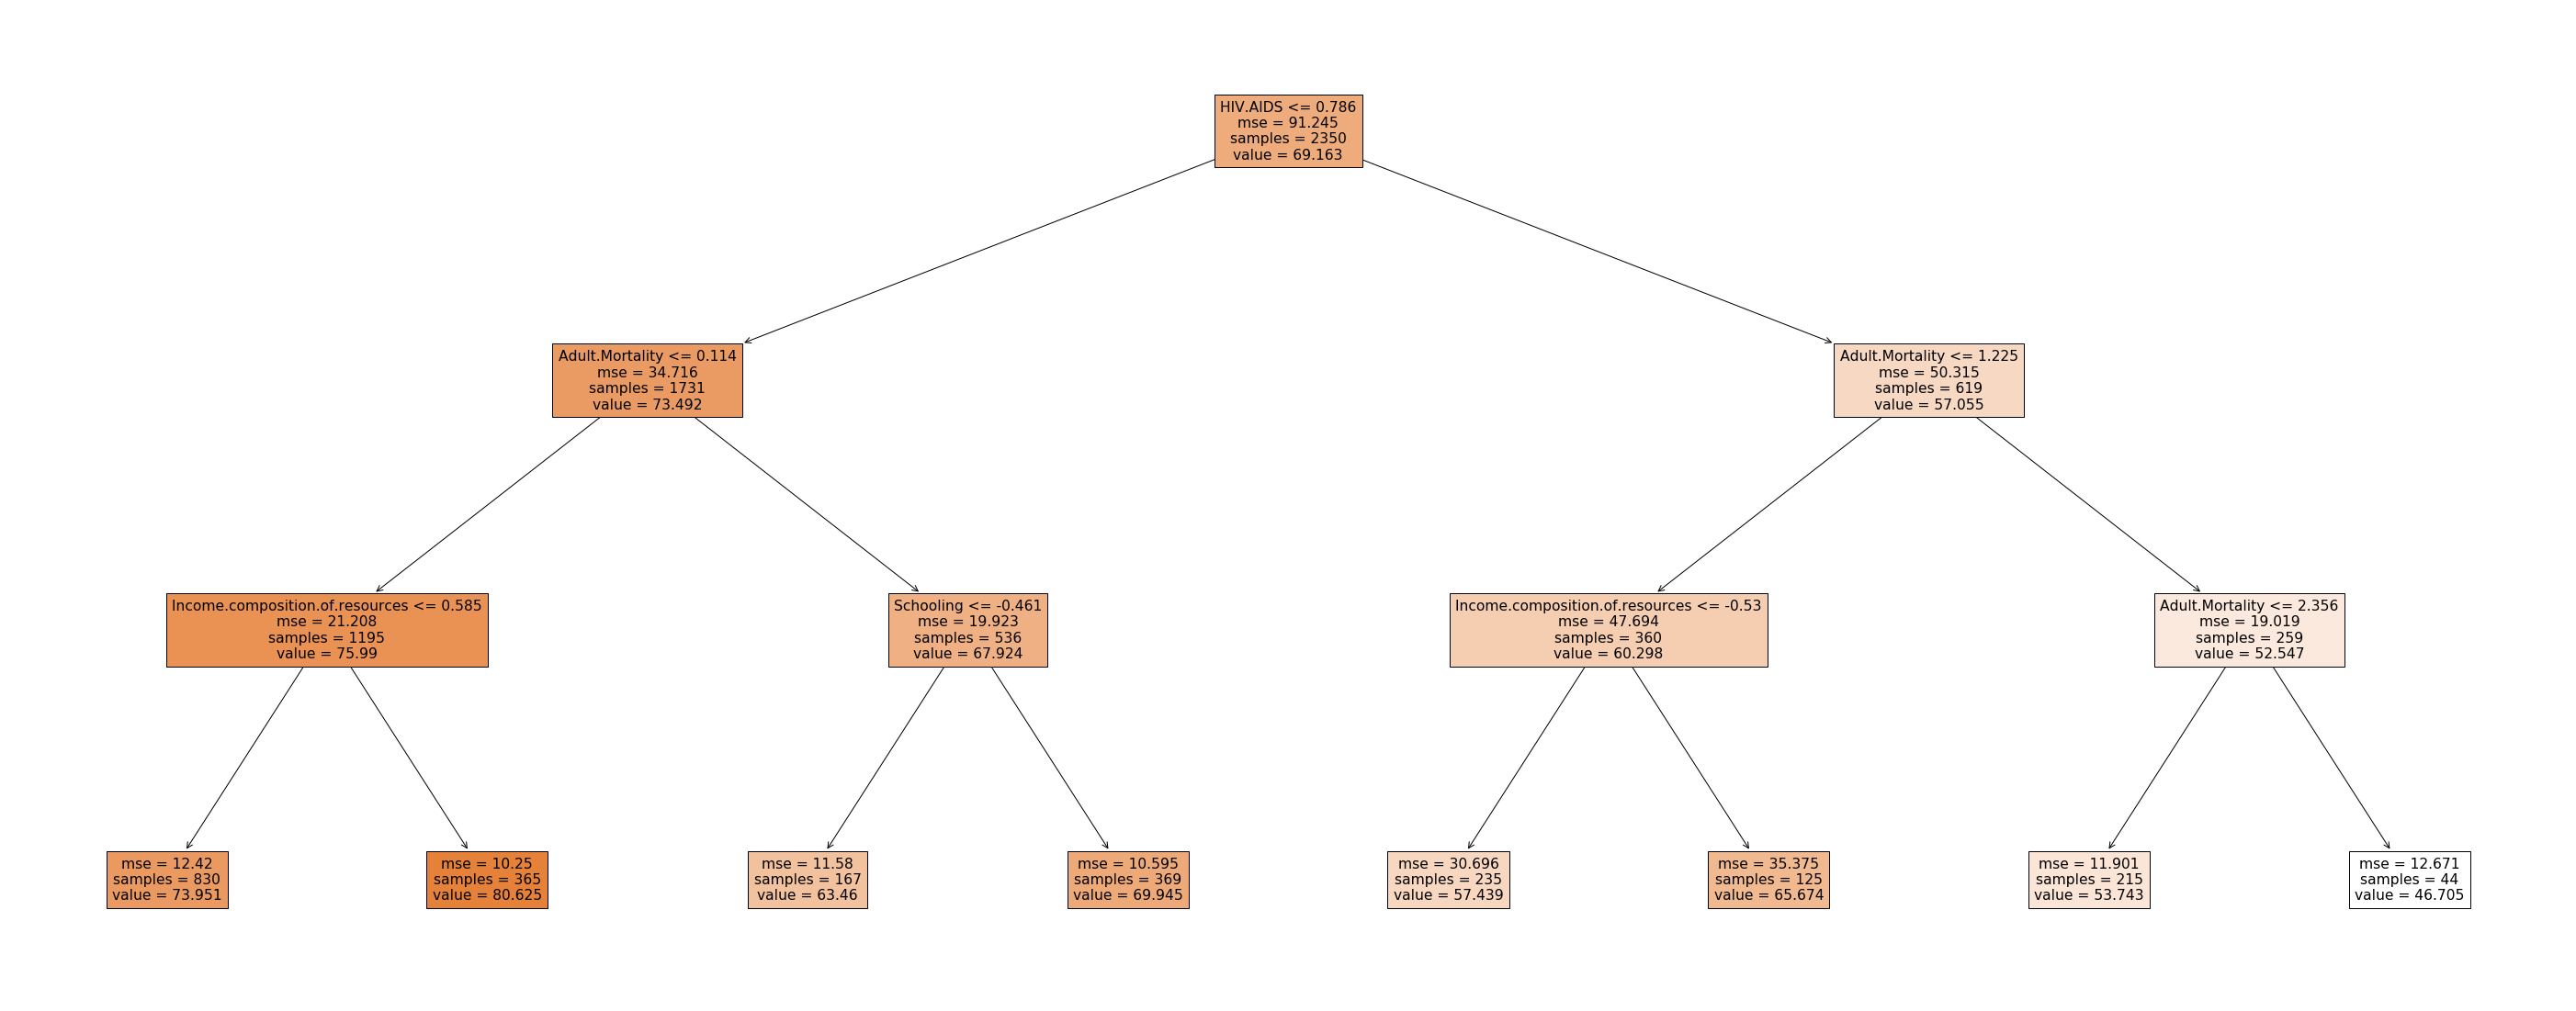

In [69]:
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(dt, feature_names=feature_names, filled=True)
plt.rcParams.update({'font.size': 32})

In [70]:
fig.savefig("Decision Tree.pdf", bbox_inches='tight')

In [71]:
reg = GradientBoostingRegressor(random_state=69)

In [72]:
reg.fit(X_train_L, y_train_L)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=69, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
reg_predict = reg.predict(X_test_L)

In [74]:
mse=mean_squared_error(y_test_L, reg_predict)
mse

5.14498207149252

In [75]:
r2_score(y_test_L, reg_predict)*100

94.49446929450419

In [76]:
#Tuning parameters

In [77]:
parameter_grid = { 
        "max_depth"         : [2,3,4,5,6,7],
        "n_estimators"      : [10,20,30],
        "max_features"      : ['auto', 'sqrt','log2'],
        "learning_rate"     :[0.15,0.1,0.05,0.01,0.005,0.001],
        "min_samples_split" : [2, 5, 10, 15],
        "min_samples_leaf"  : [1, 2, 5, 10]
        }
grid = GridSearchCV(reg, parameter_grid, n_jobs=-1, cv=5)
grid.fit(X_train_L,y_train_L)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [78]:
grid.best_params_

{'learning_rate': 0.15,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 30}

In [21]:
grid.best_score_

0.9489503911233095

In [79]:
gbm_best=GradientBoostingRegressor(n_estimators=30,max_depth=7, min_samples_split= 2,min_samples_leaf=5, 
                                subsample=1,max_features='auto', learning_rate=0.15  , random_state=10)

In [80]:
gbm_bestfit= gbm_best.fit(X_train_L,y_train_L)
y_pred_gbm = gbm_bestfit.predict(X_test_L)
mse=mean_squared_error(y_test_L, y_pred_gbm)
mse

3.6530683676056674

In [81]:
r2_score(y_test_L, y_pred_gbm)*100

96.09093291528339

In [82]:
feature_imp = pd.DataFrame(gbm_bestfit.feature_importances_, index=X_train_L.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
HIV.AIDS,0.587077
Adult.Mortality,0.196620
Income.composition.of.resources,0.132314
Schooling,0.025458
BMI,0.022191
Total.expenditure,0.009354
Alcohol,0.009335
Measles,0.005191
Polio,0.004641
Diphtheria,0.002797


In [83]:
gbm_bestfit.feature_importances_

array([0.1966201 , 0.00933505, 0.00245025, 0.00519076, 0.0221908 ,
       0.00464111, 0.00935385, 0.00279671, 0.58707681, 0.0025724 ,
       0.13231409, 0.02545806])

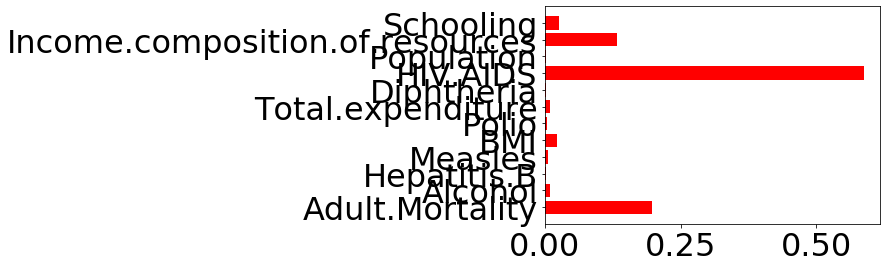

In [98]:
ax = plt.barh(X_L.columns, gbm_bestfit.feature_importances_,color="red")

Text(0.5, 0, 'Gradient Boosting Feature Importance')

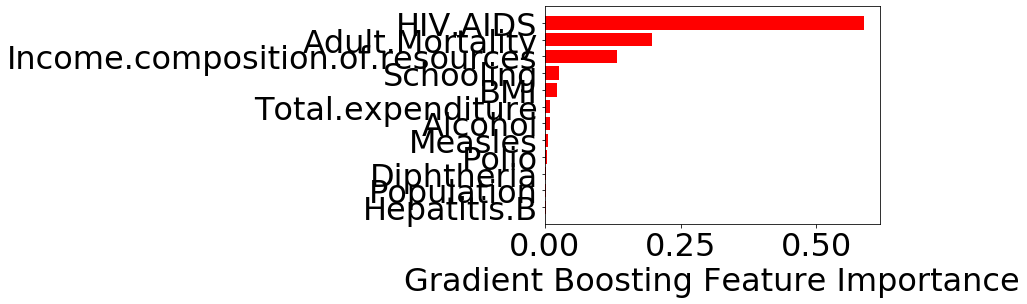

In [85]:
sorted_idx = gbm_bestfit.feature_importances_.argsort()
plt.barh(X_RF.columns[sorted_idx], gbm_bestfit.feature_importances_[sorted_idx],color = "red")
plt.xlabel("Gradient Boosting Feature Importance")

In [86]:
X = df.drop(['Life.expectancy','under.five.deaths','infant.deaths','thinness..1.19.years','thinness.5.9.years','percentage.expenditure','GDP'], axis=1)
y = df['Life.expectancy']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [88]:
print("b0: ", lm.intercept_)
print("b1,b2: ", lm.coef_)

b0:  52.71799710142233
b1,b2:  [-2.12021384e-02  1.24719959e-01 -1.82501796e-02 -4.23170559e-05
  4.74375833e-02  2.73365859e-02  7.60981485e-02  4.34216759e-02
 -4.92462873e-01 -4.72295479e-10  7.69867873e+00  7.49309346e-01]


In [89]:
#CV  𝑟2  value of the model

In [90]:
cross_val_score(model, X_train,  y_train, cv= 10, scoring="r2").mean()

0.795469824553926

In [91]:
#Predicts of Test set values:

In [92]:
y_head = model.predict(X_test)
y_head[0:5]

array([67.27945993, 76.79239003, 76.2681381 , 78.39466315, 47.11254188])

In [93]:
y_test_1 =np.array(range(0,len(y_test)))

In [94]:
mse = mean_squared_error(y_test, y_head)
mse

18.363762743573748

In [95]:
# r2 value: 

Test r2 score =  0.8034934655780901


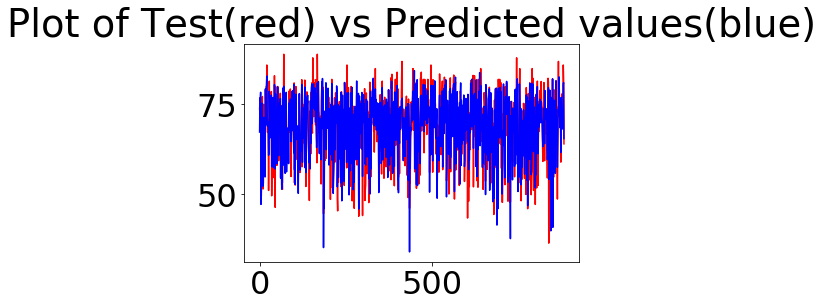

In [96]:
r2_degeri = r2_score(y_test, y_head)
print("Test r2 score = ",r2_degeri) 

plt.plot(y_test_1,y_test,color="r")
plt.plot(y_test_1,y_head,color="blue")
plt.title("Plot of Test(red) vs Predicted values(blue)")
plt.show()

In [97]:
r2_degeri*100

80.34934655780901